In [12]:

# Meilleur pour le Machine Learning Traditionnel : Détection de fraude bancaire (avec des modèles comme la régression logistique).
# Meilleur pour le Deep Learning : Reconnaissance faciale (avec des CNN comme ResNet).
# 3. Pourquoi le deep learning est efficace sur les données non structurées ?
# Le deep learning excelle dans le traitement des données non structurées comme les images, le texte et l'audio. Grâce aux réseaux neuronaux profonds, il extrait automatiquement les caractéristiques pertinentes sans intervention humaine. Ses multiples couches permettent d’identifier des modèles complexes et non évidents, rendant les algorithmes plus performants pour des tâches comme la reconnaissance vocale ou la traduction automatique.

In [ ]:
# L'information traverse le réseau de manière séquentielle :

# Les entrées sont multipliées par des poids et additionnées à un biais.
# La somme est passée à travers une fonction d'activation pour obtenir une sortie non linéaire.
# La sortie de la couche cachée devient l’entrée de la couche suivante.
# À la dernière couche, une décision ou une prédiction est effectuée.

In [13]:
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
np.random.seed(0)
x = np.arange(-1, 1, 0.1)
y = -x**2 + np.random.normal(0, 0.05, len(x))

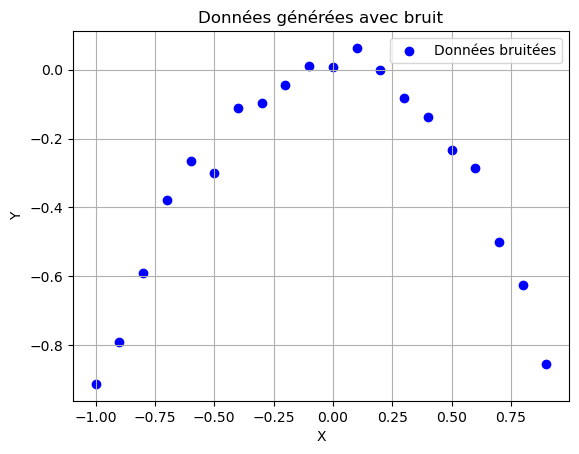

In [15]:
plt.scatter(x, y, color='blue', label="Données bruitées")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Données générées avec bruit")
plt.legend()
plt.grid()
plt.show()

In [16]:
x_train, y_train = x[:12], y[:12]
x_test, y_test = x[12:], y[12:]

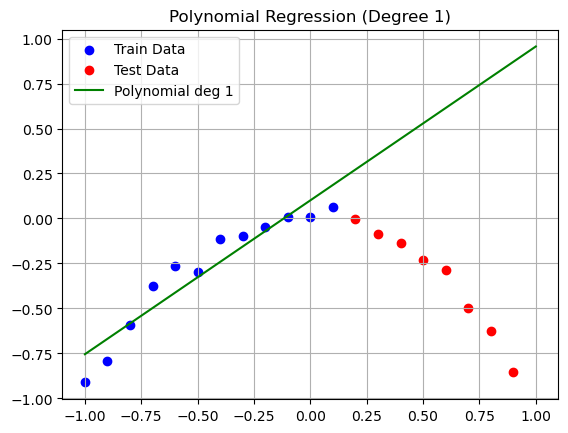

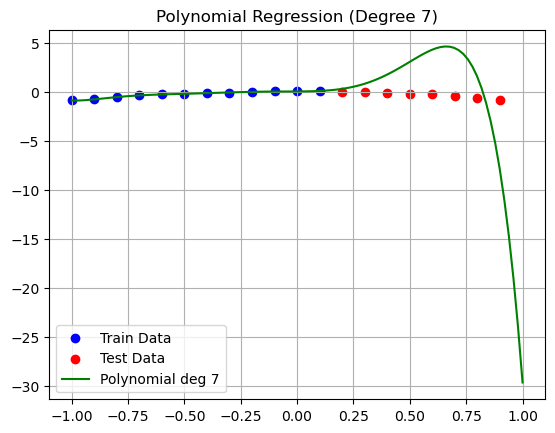

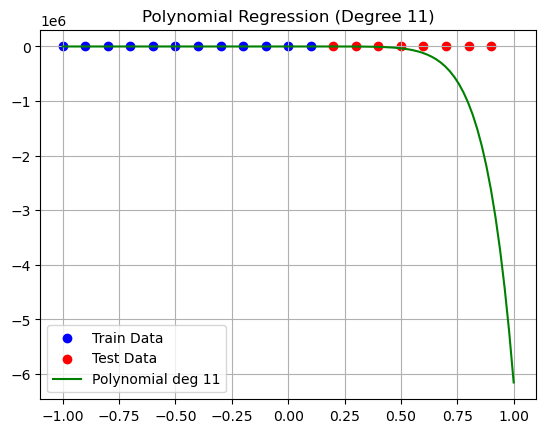

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Fonction pour ajuster un modèle polynomial à partir des données d'entraînement
def polynomial_fit(degree):
    return np.poly1d(np.polyfit(x_train, y_train, degree))

# Fonction pour tracer le modèle polynomial ajusté
def plot_polyfit(degree):
    model = polynomial_fit(degree)
    x_fit = np.linspace(-1, 1, 100)  # On définit x_fit ici pour qu'il soit bien utilisé après
    y_fit = model(x_fit)  # On applique le modèle pour obtenir les prédictions
    
    # Tracé des données et du modèle ajusté
    plt.scatter(x_train, y_train, color='blue', label="Train Data")
    plt.scatter(x_test, y_test, color='red', label="Test Data")
    plt.plot(x_fit, y_fit, color='green', label=f"Polynomial deg {degree}")
    plt.legend()
    plt.grid()
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.show()

# Tracer les modèles pour différents degrés
plot_polyfit(1)  # Régression linéaire
plot_polyfit(7)  # Modèle plus complexe
plot_polyfit(11)  # Modèle très complexe (overfitting probable)


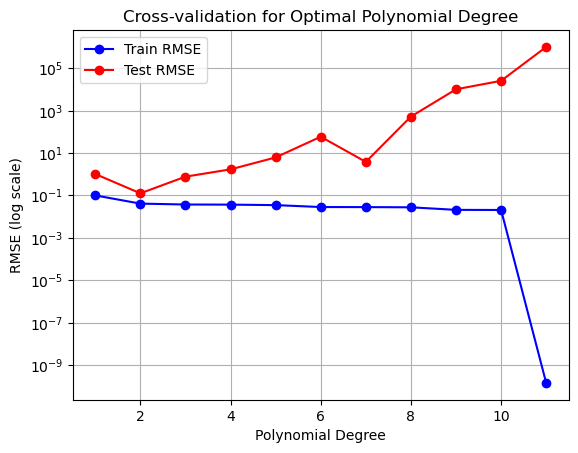

In [39]:
from sklearn.metrics import mean_squared_error

degrees = range(1, 12)
rmse_train = []
rmse_test = []

for d in degrees:
    model = polynomial_fit(d)
    y_train_pred = model(x_train)
    y_test_pred = model(x_test)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.plot(degrees, rmse_train, marker='o', label="Train RMSE", color='blue')
plt.plot(degrees, rmse_test, marker='o', label="Test RMSE", color='red')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE (log scale)")
plt.yscale("log")
plt.legend()
plt.grid()
plt.title("Cross-validation for Optimal Polynomial Degree")
plt.show()
